In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

###Q1)

In [2]:
train_data = pd.read_csv('knn-train.txt',sep='\t',header=None)
test_data = pd.read_csv('knn-test.txt',sep='\t',header=None)

In [3]:
train_data,test_data

(             0           1    2
 0    41.429973  153.757543 -1.0
 1    46.505595  163.044335  1.0
 2    41.347549  158.454885 -1.0
 3    42.025227  155.650459  1.0
 4    42.291784  151.233162 -1.0
 ..         ...         ...  ...
 795  41.052701  153.770681 -1.0
 796  44.073659  155.400268 -1.0
 797  42.276710  161.520028  1.0
 798  42.120936  159.838717  1.0
 799  45.197463  158.595645  1.0
 
 [800 rows x 3 columns],              0           1    2
 0    43.641483  159.059760  1.0
 1    42.034837  151.903267 -1.0
 2    41.600612  150.812507 -1.0
 3    44.583628  154.819656 -1.0
 4    43.808658  153.444054 -1.0
 ..         ...         ...  ...
 195  45.672052  160.869442  1.0
 196  46.105841  164.013130  1.0
 197  40.911499  157.626503 -1.0
 198  45.982099  155.937579  1.0
 199  44.985190  162.313020  1.0
 
 [200 rows x 3 columns])

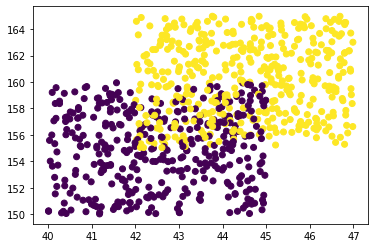

In [4]:
train = train_data.to_numpy()
plt.scatter(train[:,0],train[:,1],c=train[:,2])

In [5]:
def knn_acc(train,test,k):
  test_cnt = len(test)
  crct = 0
  for i in range(test_cnt):
    x_train = train.drop([2],axis=1).to_numpy()
    x_test = test.iloc[i].to_numpy()[:2]
    y_test = int(test.iloc[i].to_numpy()[-1])
    dist = np.linalg.norm(x_train-x_test,axis=1)
    dist_i = np.argsort(dist)[:k]
    cnt = [0,0]
    for j in dist_i:
      idx = int((train.iloc[j].to_numpy()[-1]+1)//2)
      cnt[idx]+=1
    y_pred = int(2*np.argmax(cnt)-1)
    #print(y_pred,y_test)
    if(y_pred==y_test):
      crct+=1
  return(crct/test_cnt)

In [6]:
knn_acc(train_data,test_data,5)

0.9

In [7]:
hist = np.empty((0,2))
for k in range(1,21):
  hist = np.append(hist,np.array([[k,knn_acc(train_data,test_data,k)]]),axis=0)

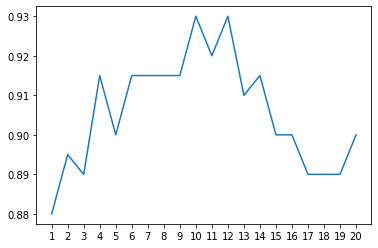

In [8]:
plt.plot(hist[:,0],hist[:,1])
plt.xticks(np.arange(1,21,1))
plt.show()

###Q2)

In [9]:
train_data = pd.read_csv('perceptron-train.txt',sep='\t',header=None)
test_data = pd.read_csv('perceptron-test.txt',sep='\t',header=None)

In [10]:
train_data,test_data

(            0           1    2
 0   -0.600256  158.213807 -1.0
 1   -4.348698  152.144727 -1.0
 2   -2.556506  158.966569 -1.0
 3   -4.272535  159.035145 -1.0
 4   -4.502656  154.050236 -1.0
 ..        ...         ...  ...
 795  4.422306  155.709689  1.0
 796  4.982146  163.520020  1.0
 797  2.920282  161.367430  1.0
 798  1.969756  155.524656  1.0
 799  4.940774  160.177951  1.0
 
 [800 rows x 3 columns],             0           1    2
 0    2.269383  160.037786  1.0
 1    1.881118  157.787488  1.0
 2   -3.705506  152.109302 -1.0
 3   -2.562792  159.242285 -1.0
 4    3.560276  155.432124  1.0
 ..        ...         ...  ...
 195 -2.763923  155.545316 -1.0
 196 -4.630988  151.852770 -1.0
 197 -1.884943  151.004748 -1.0
 198 -2.857859  157.764027 -1.0
 199  1.237443  158.760615  1.0
 
 [200 rows x 3 columns])

In [11]:
class perceptron_model:
  def __init__(self,dim):
    self.w = np.zeros((dim,1))
    self.acc = 0
    self.iter = 0
  def fit(self,X,Y):
    n = len(X)
    dim = self.w.shape[0]
    flag = 1
    while(flag):
      self.iter+=1
      flag = 0
      for i in range(n):
        cur = np.dot(self.w.T,X[i,:].reshape(dim,1))
        if(cur*Y[i]<=0):
          flag = 1
          self.w = self.w + Y[i]*X[i,:].reshape(dim,1)
          break
  def pred(self,X):
    n = len(X)
    prod = np.dot(X,self.w).reshape(n,1)
    for i in range(n):
      prod[i] = 1 if(prod[i]>0) else -1
    return prod
  def eval(self,X,Y):
    n = len(X)
    Y_pred = self.pred(X)
    crct = 0
    for i in range(n):
      if(Y_pred[i]==Y[i]):
        crct+=1
    self.acc = crct/n

In [12]:
model = perceptron_model(2)

In [13]:
X = train_data.to_numpy()[:,:2]
Y = train_data.to_numpy()[:,-1]

In [14]:
model.fit(X,Y)
model.w

array([[12788.97707042],
       [  -15.39486139]])

In [15]:
X_test = test_data.to_numpy()[:,:2]
Y_test = test_data.to_numpy()[:,-1]

In [16]:
model.eval(X_test,Y_test)
print(model.acc)

1.0


####1.

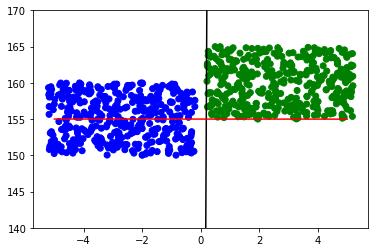

In [17]:
plt.scatter(train_data.to_numpy()[:,0],train_data.to_numpy()[:,1],c = ['green' if i>0 else 'blue' for i in train_data.to_numpy()[:,2]])
xx = np.linspace(-5,5,100)
yy = xx*model.w[0]/model.w[1]*-1
yy2 = xx*model.w[1]/model.w[0]+155
plt.plot(xx,yy,c='black')
plt.plot(xx,yy2,c='red')
plt.ylim((140,170))
plt.show()

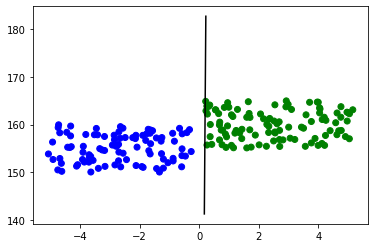

In [18]:
plt.scatter(test_data.to_numpy()[:,0],test_data.to_numpy()[:,1],c = ['green' if i>0 else 'blue' for i in test_data.to_numpy()[:,2]])
xx = np.linspace(0.17,0.22,100)
yy = -xx*model.w[0]/model.w[1]
plt.plot(xx,yy,c='black')

####2.

In [19]:
n = len(X)
w_star = model.w/np.linalg.norm(model.w)
gam = np.min(np.abs(np.dot(X,w_star).reshape(n,1)))

In [20]:
print("R :",np.max(np.linalg.norm(X,axis=1)))
print("\u03B3 :",gam)

R : 164.99445948247956
γ : 0.018298438394545036


####3.

In [21]:
print('Number of iterations taken to converge : ',model.iter)

Number of iterations taken to converge :  10990


###Q3)

In [22]:
train_data = pd.read_csv('perceptron-biased-train.txt',sep='\t',header=None)
test_data = pd.read_csv('perceptron-biased-test.txt',sep='\t',header=None)

In [23]:
bias_model = perceptron_model(3)

In [24]:
X = np.append(train_data.to_numpy()[:,:2],np.ones((len(train_data),1)),axis=1)
Y = train_data.to_numpy()[:,-1]

In [25]:
X

array([[ 42.4957173 , 164.10344185,   1.        ],
       [ 45.46175554, 162.47225377,   1.        ],
       [ 42.37684036, 159.5919576 ,   1.        ],
       ...,
       [ 36.25531034, 157.59238323,   1.        ],
       [ 41.51346957, 160.07487553,   1.        ],
       [ 37.11500564, 157.03550346,   1.        ]])

In [26]:
bias_model.fit(X,Y)
bias_model.w

array([[   6846.96288997],
       [   -558.85511217],
       [-189197.        ]])

In [27]:
bias_model.iter

4656250

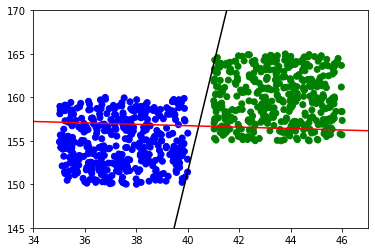

In [42]:
plt.scatter(train_data.to_numpy()[:,0],train_data.to_numpy()[:,1],c = ['green' if i>0 else 'blue' for i in train_data.to_numpy()[:,2]])
xx = np.linspace(20,60,100)
yy = -xx*bias_model.w[0,0]/bias_model.w[1,0] - bias_model.w[2,0]/bias_model.w[1,0]
yy2 = xx*bias_model.w[1]/bias_model.w[0]+160
plt.plot(xx,yy,c='black')
plt.plot(xx,yy2,c='red')
plt.xlim(34,47)
plt.ylim(145,170)
plt.show()

In [49]:
X_test = np.append(test_data.to_numpy()[:,:2],np.ones((len(test_data),1)),axis=1)
Y_test = test_data.to_numpy()[:,-1]

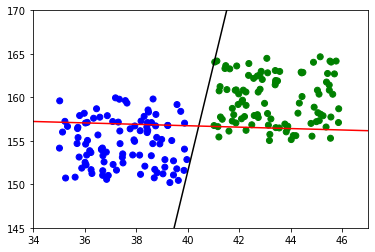

In [50]:
plt.scatter(test_data.to_numpy()[:,0],test_data.to_numpy()[:,1],c = ['green' if i>0 else 'blue' for i in test_data.to_numpy()[:,2]])
xx = np.linspace(20,60,100)
yy = -xx*bias_model.w[0,0]/bias_model.w[1,0] - bias_model.w[2,0]/bias_model.w[1,0]
yy2 = xx*bias_model.w[1]/bias_model.w[0]+160
plt.plot(xx,yy,c='black')
plt.plot(xx,yy2,c='red')
plt.xlim(34,47)
plt.ylim(145,170)
plt.show()

In [51]:
bias_model.eval(X_test,Y_test)
bias_model.acc

1.0

In [52]:
n = len(X)
w_star = bias_model.w/np.linalg.norm(bias_model.w)
gam = np.min(np.abs(np.dot(X,w_star).reshape(n,1)))

In [53]:
print("R :",np.max(np.linalg.norm(X,axis=1)))
print("\u03B3 :",gam)

R : 170.87452504795513
γ : 4.5222696098967674e-07
